In [1]:
import pandas as pd
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
# Read CSV and print first 5 lines

csv = "clean_data.csv"
data_pd = pd.read_csv(csv)
data_pd.head()

,Age,Gender,Occupation,Use Social Media (Y/N),Soical Media Platforms Used,Average time on social media (per Day),How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [3]:
# Create a new Dataframe for 'Male' Gender from original dataframe. 

male_df = data_pd[data_pd['Gender'] == "Male"]

print(male_df)

      Age Gender          Occupation Use Social Media (Y/N)  \
0    21.0   Male  University Student                    Yes   
9    20.0   Male  University Student                     No   
10   24.0   Male  University Student                    Yes   
14   22.0   Male  University Student                    Yes   
15   23.0   Male  University Student                    Yes   
..    ...    ...                 ...                    ...   
439  18.0   Male      School Student                    Yes   
440  15.0   Male      School Student                    Yes   
446  24.0   Male     Salaried Worker                    Yes   
449  21.0   Male  University Student                    Yes   
450  53.0   Male     Salaried Worker                    Yes   

                           Soical Media Platforms Used  \
0    Facebook, Twitter, Instagram, YouTube, Discord...   
9                                    Reddit, Pinterest   
10               Facebook, Instagram, YouTube, Discord   
14         

In [4]:
# Create a new Dataframe for 'Female' Gender from original dataframe. 

female_df = data_pd[data_pd['Gender'] == "Female"]

print(female_df)

      Age  Gender          Occupation Use Social Media (Y/N)  \
1    21.0  Female  University Student                    Yes   
2    21.0  Female  University Student                    Yes   
3    21.0  Female  University Student                    Yes   
4    21.0  Female  University Student                    Yes   
5    22.0  Female  University Student                    Yes   
..    ...     ...                 ...                    ...   
443  35.0  Female     Salaried Worker                    Yes   
444  30.0  Female     Salaried Worker                    Yes   
445  32.0  Female     Salaried Worker                    Yes   
447  26.0  Female     Salaried Worker                    Yes   
448  29.0  Female     Salaried Worker                    Yes   

                           Soical Media Platforms Used  \
1    Facebook, Twitter, Instagram, YouTube, Discord...   
2              Facebook, Instagram, YouTube, Pinterest   
3                                  Facebook, Instagram   

In [5]:
# Determine Number of females in new dataframe.

count_female = (female_df['Gender'] == 'Female').sum()

count_female

245

In [6]:
# Determine Number of males in new dataframe.

count_male = (male_df['Gender'] == 'Male').sum()

count_male

201

In [7]:
# Group the male dataframe by time spent on social media, and find the average sleep issue rank for each category. 

avg_sleep_per_hours = male_df.groupby('Average time on social media (per Day)')['On a scale of 1 to 5, how often do you face issues regarding sleep?'].mean().reset_index()


In [8]:
# Reset index so that it is in an order that makes sense for the graph. 

avg_sleep_per_hours = avg_sleep_per_hours.reindex([4, 0, 1, 2, 3, 5]).reset_index()

avg_sleep_per_hours

,index,Average time on social media (per Day),"On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4,Less than an Hour,2.807692
1,0,Between 1 and 2 hours,3.026316
2,1,Between 2 and 3 hours,3.232558
3,2,Between 3 and 4 hours,3.100000
4,3,Between 4 and 5 hours,3.259259
5,5,More than 5 hours,3.810811


In [9]:
# Group the female dataframe by time spent on social media, and find the average sleep issue rank for each category. 

avg_sleep_per_hours_female = female_df.groupby('Average time on social media (per Day)')['On a scale of 1 to 5, how often do you face issues regarding sleep?'].mean().reset_index()

In [10]:
# Reset index so that it is in an order that makes sense for the graph. 

avg_sleep_per_hours_female = avg_sleep_per_hours_female.reindex([4, 0, 1, 2, 3, 5]).reset_index()

avg_sleep_per_hours_female

,index,Average time on social media (per Day),"On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4,Less than an Hour,1.428571
1,0,Between 1 and 2 hours,2.703704
2,1,Between 2 and 3 hours,3.061224
3,2,Between 3 and 4 hours,3.321429
4,3,Between 4 and 5 hours,3.542857
5,5,More than 5 hours,3.366197


In [11]:
# Determine number of males that have a sleep issues rated higher than a 3. 

count_sleep_per_hours = len(male_df[male_df['On a scale of 1 to 5, how often do you face issues regarding sleep?']> 3])

count_sleep_per_hours

97

In [12]:
# Determine percentage of males that have a definite sleep issue (Ranked 4 or 5 out of 5)

percentage_sleep = (count_sleep_per_hours/count_male)

percentage_sleep

0.48258706467661694

In [13]:
# Determine number of females that have a sleep issues rated higher than a 3. 

count_sleep_per_hours_female = len(female_df[female_df['On a scale of 1 to 5, how often do you face issues regarding sleep?']> 3])

count_sleep_per_hours_female

120

In [14]:
# Determine percentage of females that have a definite sleep issue (Ranked 4 or 5 out of 5)

percentage_sleep_female = (count_sleep_per_hours_female/count_female)

percentage_sleep_female

0.4897959183673469

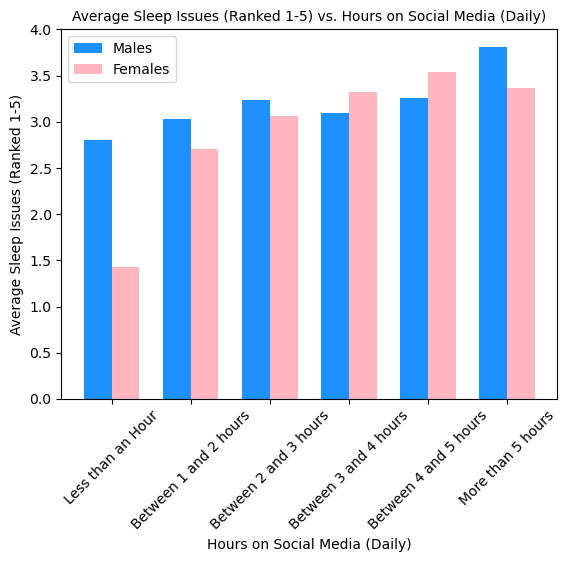

In [15]:
# Code for Males

x_values_males = avg_sleep_per_hours['Average time on social media (per Day)']
y_values_males = avg_sleep_per_hours['On a scale of 1 to 5, how often do you face issues regarding sleep?']

# Code for Females

x_values_females = avg_sleep_per_hours_female['Average time on social media (per Day)']
y_values_females = avg_sleep_per_hours_female['On a scale of 1 to 5, how often do you face issues regarding sleep?']
bar_width = 0.35
index = range(len(x_values_males))

# Create a graph displaying both male and female average concentration issues (Ranked 1-5) based on hours of social media per day 

plt.bar(index, y_values_males, bar_width, label='Males', color='dodgerblue')
plt.bar([i + bar_width for i in index], y_values_females, bar_width, label='Females', color='lightpink')
plt.xlabel('Hours on Social Media (Daily)')
plt.ylabel('Average Sleep Issues (Ranked 1-5)')
plt.xticks([i + bar_width / 2 for i in index], x_values_males, rotation=45)
plt.title('Average Sleep Issues (Ranked 1-5) vs. Hours on Social Media (Daily)',fontsize=10)
plt.legend()  
plt.savefig("output_data/Fig1_combined.png", bbox_inches='tight')

# Display the graoh

plt.show()  

In [16]:
#To get values for the chart

avg_concentration_per_hours = male_df.groupby('Average time on social media (per Day)')['On a scale of 1 to 5, how easily distracted are you?'].mean().reset_index()

In [17]:
# Reset index so that it is in an order that makes sense for the graph. 

avg_concentration_per_hours = avg_concentration_per_hours.reindex([4, 0, 1, 2, 3, 5]).reset_index()

avg_concentration_per_hours

,index,Average time on social media (per Day),"On a scale of 1 to 5, how easily distracted are you?"
0,4,Less than an Hour,2.153846
1,0,Between 1 and 2 hours,3.000000
2,1,Between 2 and 3 hours,3.488372
3,2,Between 3 and 4 hours,3.333333
4,3,Between 4 and 5 hours,3.370370
5,5,More than 5 hours,3.783784


In [18]:
# Determine number of males that have a sleep issues rated higher than a 3. 

count_concentration_per_hours = len(male_df[male_df['On a scale of 1 to 5, how easily distracted are you?']> 3])

count_concentration_per_hours

80

In [19]:
# Determine percentage of males that have a definite sleep issue (Ranked 4 or 5 out of 5)

percentage_concentration = (count_concentration_per_hours/count_male)

percentage_concentration

0.39800995024875624

In [20]:
#To get values for the chart

avg_concentration_per_hours_females = female_df.groupby('Average time on social media (per Day)')['On a scale of 1 to 5, how easily distracted are you?'].mean().reset_index()

In [21]:
# Reset index so that it is in an order that makes sense for the graph. 

avg_concentration_per_hours_females = avg_concentration_per_hours_females.reindex([4, 0, 1, 2, 3, 5]).reset_index()

avg_concentration_per_hours_females

,index,Average time on social media (per Day),"On a scale of 1 to 5, how easily distracted are you?"
0,4,Less than an Hour,1.714286
1,0,Between 1 and 2 hours,2.888889
2,1,Between 2 and 3 hours,3.183673
3,2,Between 3 and 4 hours,3.553571
4,3,Between 4 and 5 hours,3.771429
5,5,More than 5 hours,3.718310


In [22]:
# Determine number of females that have a sleep issues rated higher than a 3. 

count_concentration_per_hours_female = len(female_df[female_df['On a scale of 1 to 5, how easily distracted are you?']> 3])

count_concentration_per_hours_female

114

In [23]:
# Determine percentage of females that have a definite sleep issue (Ranked 4 or 5 out of 5)

percentage_concentration_female = (count_concentration_per_hours_female/count_female)

percentage_concentration_female

0.46530612244897956

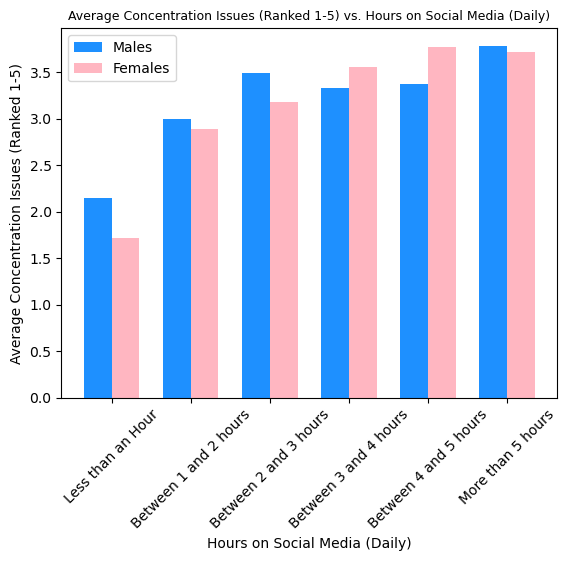

In [24]:
# Code for Males

x_values_males = avg_concentration_per_hours['Average time on social media (per Day)']
y_values_males = avg_concentration_per_hours['On a scale of 1 to 5, how easily distracted are you?']

# Code for Females

x_values_females = avg_concentration_per_hours_females['Average time on social media (per Day)']
y_values_females = avg_concentration_per_hours_females['On a scale of 1 to 5, how easily distracted are you?']
bar_width = 0.35
index = range(len(x_values_males))

# Create a graph displaying both male and female average concentration issues (Ranked 1-5) based on hours of social media per day 

plt.bar(index, y_values_males, bar_width, label='Males', color='dodgerblue')
plt.bar([i + bar_width for i in index], y_values_females, bar_width, label='Females', color='lightpink')
plt.xlabel('Hours on Social Media (Daily)')
plt.ylabel('Average Concentration Issues (Ranked 1-5)')
plt.xticks([i + bar_width / 2 for i in index], x_values_males, rotation=45)
plt.title('Average Concentration Issues (Ranked 1-5) vs. Hours on Social Media (Daily)',fontsize=9)
plt.legend() 
plt.savefig("output_data/Fig2_combined.png", bbox_inches='tight')

# Display the graph

plt.show()  

In [25]:
#To get values for the chart

avg_mental_health_per_hours = male_df.groupby('Average time on social media (per Day)')['How often do you feel depressed or down?'].mean().reset_index()

In [26]:
# Reset index so that it is in an order that makes sense for the graph. 

avg_mental_health_per_hours = avg_mental_health_per_hours.reindex([4, 0, 1, 2, 3, 5]).reset_index()

avg_mental_health_per_hours

,index,Average time on social media (per Day),How often do you feel depressed or down?
0,4,Less than an Hour,2.115385
1,0,Between 1 and 2 hours,2.842105
2,1,Between 2 and 3 hours,3.232558
3,2,Between 3 and 4 hours,3.233333
4,3,Between 4 and 5 hours,3.111111
5,5,More than 5 hours,3.675676


In [27]:
# Determine number of males that have a sleep issues rated higher than a 3. 

count__mental_health_per_hours_male = len(male_df[male_df['How often do you feel depressed or down?']> 3])

count__mental_health_per_hours_male

72

In [28]:
# Determine percentage of males that have a definite sleep issue (Ranked 4 or 5 out of 5)

percentage_mental_health_concentration_male = (count__mental_health_per_hours_male/count_male)

percentage_mental_health_concentration_male

0.3582089552238806

In [29]:
#To get values for the chart

avg_mental_health_per_hours_female = female_df.groupby('Average time on social media (per Day)')['How often do you feel depressed or down?'].mean().reset_index()

In [30]:
# Reset index so that it is in an order that makes sense for the graph. 

avg_mental_health_per_hours_female = avg_mental_health_per_hours_female.reindex([4, 0, 1, 2, 3, 5]).reset_index()

avg_mental_health_per_hours_female

,index,Average time on social media (per Day),How often do you feel depressed or down?
0,4,Less than an Hour,1.571429
1,0,Between 1 and 2 hours,2.740741
2,1,Between 2 and 3 hours,3.163265
3,2,Between 3 and 4 hours,3.428571
4,3,Between 4 and 5 hours,3.628571
5,5,More than 5 hours,3.830986


In [31]:
# Determine number of females that have a sleep issues rated higher than a 3. 

count__mental_health_per_hours_females = len(female_df[female_df['How often do you feel depressed or down?']> 3])

count__mental_health_per_hours_females

131

In [32]:
# Determine percentage of females that have a definite sleep issue (Ranked 4 or 5 out of 5)

percentage_mental_health_concentration_females = (count__mental_health_per_hours_females/count_female)

percentage_mental_health_concentration_females

0.5346938775510204

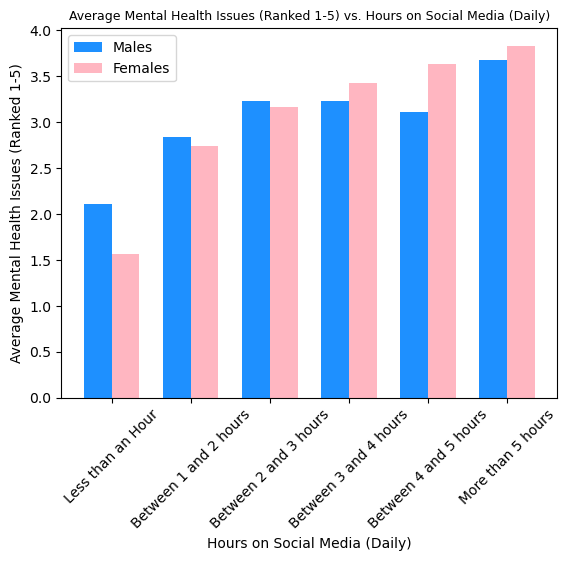

In [33]:
# Code for Males

x_values_males = avg_mental_health_per_hours['Average time on social media (per Day)']
y_values_males = avg_mental_health_per_hours['How often do you feel depressed or down?']

# Code for Females

x_values_females = avg_mental_health_per_hours_female['Average time on social media (per Day)']
y_values_females = avg_mental_health_per_hours_female['How often do you feel depressed or down?']
bar_width = 0.35
index = range(len(x_values_males))

# Create a graph displaying both male and female average concentration issues (Ranked 1-5) based on hours of social media per day 

plt.bar(index, y_values_males, bar_width, label='Males', color='dodgerblue')
plt.bar([i + bar_width for i in index], y_values_females, bar_width, label='Females', color='lightpink')
plt.xlabel('Hours on Social Media (Daily)')
plt.ylabel('Average Mental Health Issues (Ranked 1-5)')
plt.xticks([i + bar_width / 2 for i in index], x_values_males, rotation=45)
plt.title('Average Mental Health Issues (Ranked 1-5) vs. Hours on Social Media (Daily)',fontsize=9)
plt.legend()  
plt.savefig("output_data/Fig3_combined.png", bbox_inches='tight')

# Display the graph

plt.show()